# Key Concepts 

#### GHI (Global Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar total recibida por la superficie horizontal de la Tierra, incluyendo la radiación directa del sol, la radiación difusa (reflejada por la atmósfera) y la radiación del cielo nublado.
#### DNI (Direct Normal Irradiance) [W/m2]: 
Es la cantidad de radiación solar directa recibida por un panel solar colocado perpendicularmente al sol. No incluye la radiación difusa ni la radiación reflejada.
#### DHI (Diffuse Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar difusa que llega a la superficie de la Tierra proveniente de todas las direcciones del cielo, excepto la radiación directa del sol.

## GHI=DNI⋅cos(ángulo Solar)+DHI

## Potencia Generada por un sistema fotovoltaico
Potencia (W)=Radiación Solar (W/m 2 )×Eficiencia del Panel Solar× Area del Panel Solar (m 2 )

<img src="../../Visualizations/img/areas.png" width="50%">

## Import Libraries

In [2]:
import numpy as np            # manejo arreglos
import pandas as pd           # manipulación dataframes      
import matplotlib.pyplot as plt    # Realiza graficas
import pytz                        # manipulación de zonas horarias                     
from datetime import datetime, date, timedelta  # manipulacion de fechas y horas

## Import CSV Fronius 01-01-2023


In [3]:
# leer el archivo csv en la ruta Data/Processed/SFV_13-02-2023.csv
df = pd.read_csv('../../Data/Processed/SFV_13-02-2023.csv')

# nuevo dataframe con las columnas de hora y producción fotovoltaica
df_SFV = df[['Hora', 'Producción fotovoltaica']]


# # Buscar el valor '11:40' en la columna 'Hora'
# selected_rows = df_SFV.loc[df_SFV['Hora'] == '06:45']
# print(selected_rows)



## Potencia [W]

In [17]:
import numpy as np

# calcula potencia dividiendo la producción fotovoltaica entre 5 minutos
df_SFV['Potencia'] = df_SFV['Producción fotovoltaica'] / (5/60)
print(df_SFV.head())




    Hora  Producción fotovoltaica  Potencia  Irr
0  00:00                      0.0       0.0  0.0
1  00:05                      0.0       0.0  0.0
2  00:10                      0.0       0.0  0.0
3  00:15                      0.0       0.0  0.0
4  00:20                      0.0       0.0  0.0


/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_26026/4247373422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SFV['Potencia'] = df_SFV['Producción fotovoltaica'] / (5/60)


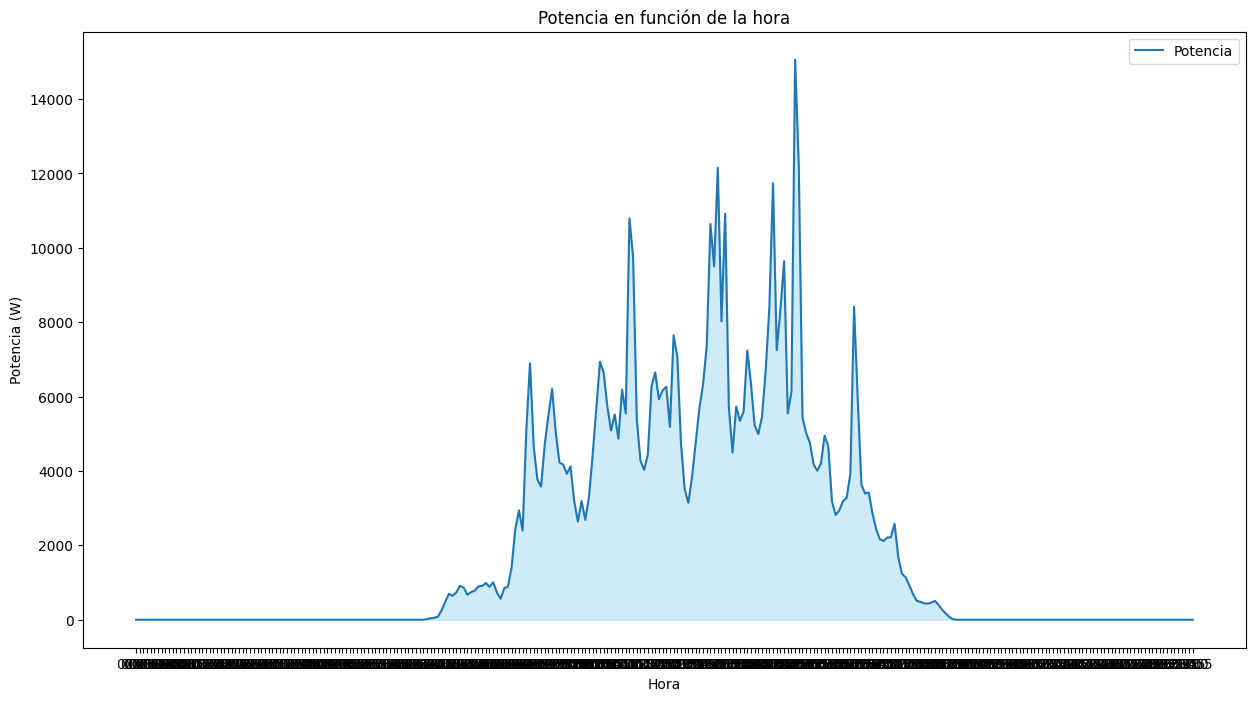

Área bajo la curva: 590350.72 Wh


In [16]:
# # Graficar la potencia en función de la hora
plt.figure(figsize=(15,8))
plt.plot(df_SFV['Hora'], df_SFV['Potencia'], label='Potencia')
# plt.plot(df['Hora'] ,df['Potencia aparente | FRONIUS Symo 15.0-3 208 (1)'], label='Potencia aparente')
#plt.fill_between
plt.fill_between(df_SFV['Hora'], df_SFV['Potencia'], color='skyblue', alpha=0.4)

plt.xlabel('Hora')
plt.ylabel('Potencia (W)')
plt.title('Potencia en función de la hora')
plt.legend()
plt.show()

# Calcular el área bajo la curva mediante integración numérica
from scipy.integrate import simps
area = simps(df_SFV['Potencia'], dx=1)
print('Área bajo la curva:', area, 'Wh')


## Grafico producción fotovoltaica Fronius

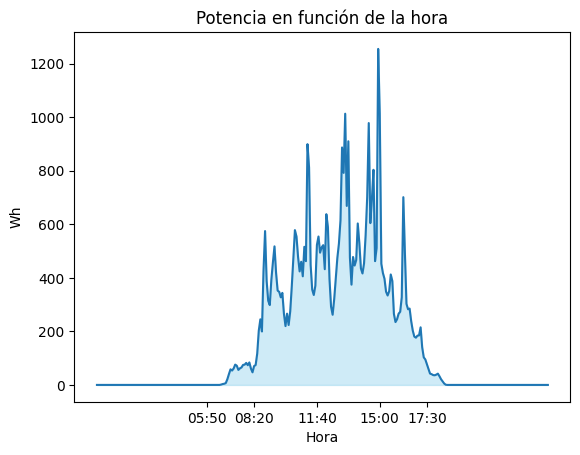

Área bajo la curva: 49195.893333333326 Wh


In [20]:
# Graficar la producción fotovoltaica en función de la hora
plt.plot(df_SFV['Hora'], df_SFV['Producción fotovoltaica'], label='Producción fotovoltaica')
#plt.fill_between
plt.fill_between(df_SFV['Hora'], df_SFV['Producción fotovoltaica'], color='skyblue', alpha=0.4)
plt.xlabel('Hora')
plt.ylabel('Wh')
plt.title('Potencia en función de la hora')
plt.xticks([70,100,140,180,210])  
plt.show()

# Calcular el área bajo la curva mediante integración numérica
from scipy.integrate import simps
area = simps(df_SFV['Producción fotovoltaica'], dx=1)
print('Área bajo la curva:', area, 'Wh')

## Irradiancia calculada 

In [21]:
eficiencia = 0.2094
catidad_pv= 30
area =2.274*1.134

potencia_pv= df_SFV['Potencia']

Irr=potencia_pv/(eficiencia*area*catidad_pv)
# print(Irr)
# agregar Irrr en df_SFV
df_SFV['Irr'] = Irr
print(df_SFV)

      Hora  Producción fotovoltaica  Potencia  Irr
0    00:00                      0.0       0.0  0.0
1    00:05                      0.0       0.0  0.0
2    00:10                      0.0       0.0  0.0
3    00:15                      0.0       0.0  0.0
4    00:20                      0.0       0.0  0.0
..     ...                      ...       ...  ...
283  23:35                      0.0       0.0  0.0
284  23:40                      0.0       0.0  0.0
285  23:45                      0.0       0.0  0.0
286  23:50                      0.0       0.0  0.0
287  23:55                      0.0       0.0  0.0

[288 rows x 4 columns]


/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_26026/219400591.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SFV['Irr'] = Irr


## Graph Irr

Irradicancia calculada a partir de la producción del pv

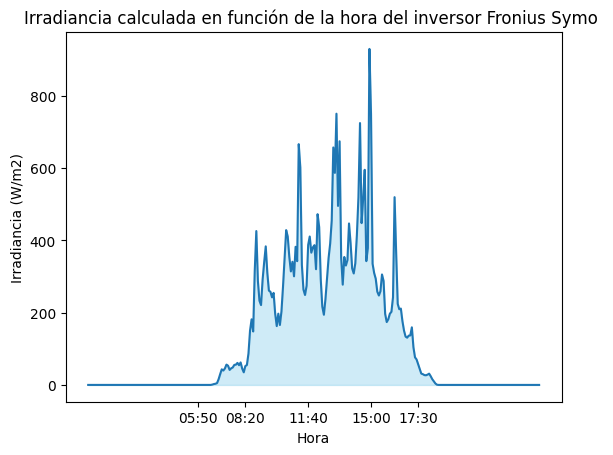

Área bajo la curva: 36442.54093411458 W/m2


In [37]:
# Graficar la Irradiación en función de la hora
plt.plot(df_SFV['Hora'], df_SFV['Irr'])
# plt.fill_between
plt.fill_between(df_SFV['Hora'], df_SFV['Irr'], color='skyblue', alpha=0.4)
plt.xlabel('Hora')
plt.ylabel('Irradiancia (W/m2)')
plt.title('Irradiancia calculada en función de la hora del inversor Fronius Symo ')
plt.xticks([70,100,140,180,210])
plt.show()


# Calcular el área bajo la curva mediante integración numérica
from scipy.integrate import simps
area = simps(df_SFV['Irr'], dx=1)
print('Área bajo la curva:', area, 'W/m2')

In [24]:
# Cuantos datos hay en la columna 'Hora' que sean '11:'
selected_rows = df_SFV.loc[df_SFV['Hora'].str.contains('11:')]
print(selected_rows)


      Hora  Producción fotovoltaica  Potencia         Irr
132  11:00                   515.86   6190.32  382.130456
133  11:05                   462.28   5547.36  342.440327
134  11:10                   899.21  10790.52  666.102291
135  11:15                   812.00   9744.00  601.500272
136  11:20                   448.00   5376.00  331.862219
137  11:25                   356.08   4272.96  263.771203
138  11:30                   335.92   4031.04  248.837403
139  11:35                   370.31   4443.72  274.312273
140  11:40                   522.81   6273.72  387.278765
141  11:45                   554.25   6651.00  410.568382
142  11:50                   493.93   5927.16  365.885504
143  11:55                   513.57   6162.84  380.434107


## Import CSV Solcast 13-02-2023

In [25]:
# Leer CSV solcast_13-02-2023.csv
df_solcast = pd.read_csv('../../Data/Processed/solcast_13-02-2023_PT5M.csv')
# Eliminar el primer carácter de 'Time'
df_solcast['Time'] = df_solcast['Time'].str.slice(1)
print(df_solcast)

     dhi  DHI  GHI            period_end period        Date   Time
0      0    0    0  2023-02-13T00:00:00Z   PT5M  2023-02-13  19:00
1      0    0    0  2023-02-13T00:05:00Z   PT5M  2023-02-13  19:05
2      0    0    0  2023-02-13T00:10:00Z   PT5M  2023-02-13  19:10
3      0    0    0  2023-02-13T00:15:00Z   PT5M  2023-02-13  19:15
4      0    0    0  2023-02-13T00:20:00Z   PT5M  2023-02-13  19:20
..   ...  ...  ...                   ...    ...         ...    ...
283    0    0    0  2023-02-13T23:35:00Z   PT5M  2023-02-13  18:35
284    0    0    0  2023-02-13T23:40:00Z   PT5M  2023-02-13  18:40
285    0    0    0  2023-02-13T23:45:00Z   PT5M  2023-02-13  18:45
286    0    0    0  2023-02-13T23:50:00Z   PT5M  2023-02-13  18:50
287    0    0    0  2023-02-13T23:55:00Z   PT5M  2023-02-13  18:55

[288 rows x 7 columns]


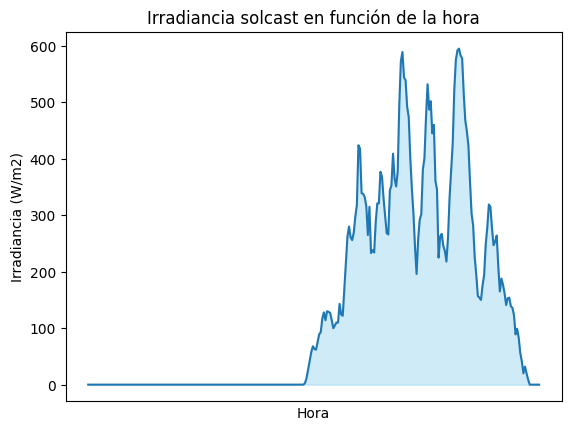

Área bajo la curva: 38204.666666666664 W/m2


In [35]:
# grafica GHI en funcion del tiempo
plt.plot(df_solcast['Time'], df_solcast['GHI'])
# plt.fill_between
plt.fill_between(df_solcast['Time'], df_solcast['GHI'], color='skyblue', alpha=0.4)
plt.xlabel('Hora')
plt.ylabel('Irradiancia (W/m2)')
plt.title('Irradiancia solcast en función de la hora')
plt.xticks([])
plt.show()

# area bajo la curva
area = simps(df_solcast['GHI'], dx=1)
print('Área bajo la curva:', area, 'W/m2')


## Data correlation

In [26]:
# Crear un nuevo DataFrame vacío
new_df = pd.DataFrame()

# Iterar sobre cada valor en 'Time'
for time in df_solcast ['Time']:
    # Buscar el valor en 'Hora' y guardar las filas correspondientes en el nuevo DataFrame
    matching_rows = df_SFV[df_SFV['Hora'] == time]
    new_df = pd.concat([new_df, matching_rows])

print(new_df)

      Hora  Producción fotovoltaica  Potencia       Irr
228  19:00                     0.00      0.00  0.000000
229  19:05                     0.00      0.00  0.000000
230  19:10                     0.00      0.00  0.000000
231  19:15                     0.00      0.00  0.000000
232  19:20                     0.00      0.00  0.000000
..     ...                      ...       ...       ...
223  18:35                     0.01      0.12  0.007408
224  18:40                     0.00      0.00  0.000000
225  18:45                     0.00      0.00  0.000000
226  18:50                     0.00      0.00  0.000000
227  18:55                     0.00      0.00  0.000000

[288 rows x 4 columns]


## Graph Comparison of irradiances (Fronius vs Solcast)

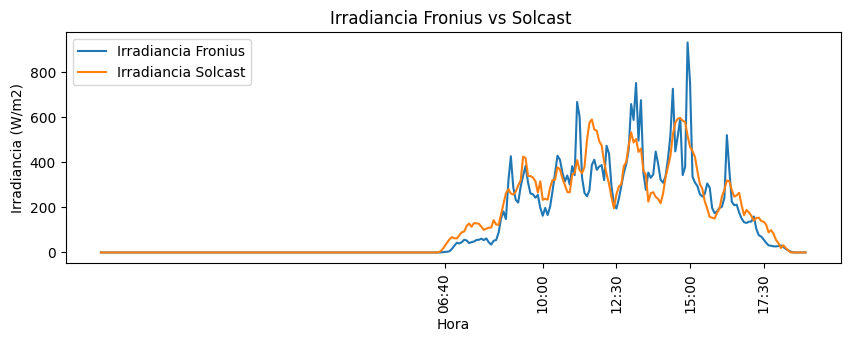

In [28]:
#graficar  Irr en new_df
plt.figure(figsize=(10,3))
plt.plot(new_df['Hora'], new_df['Irr'], label='Irradiancia Fronius')
#agregar grafica de  GHI de df_solcast
plt.plot(df_solcast['Time'], df_solcast['GHI'], label='Irradiancia Solcast')


plt.xlabel('Hora')
plt.ylabel('Irradiancia (W/m2)')
plt.title('Irradiancia Fronius vs Solcast ')
plt.xticks([140,180,210,240,270])
plt.xticks(rotation=90)
plt.legend()
plt.show()


## Import CSV Solargis 13-02-2023

In [38]:
# Leer CSV solgis_13-02-2023.csv
df_solargis = pd.read_csv('../../Data/Processed/solargis_13-02-2023.csv')
# Eliminar el primer carácter de 'Time'
df_solargis['Time'] = df_solargis['Time'].str.slice(1)
print(df_solargis.head())
print(df_solcast.shape)


         Date  GHI  DNI  DHI  TEMP   WS  WD  flagR     SE     SA    RH     AP  \
0  13.02.2023    0    0    0  15.6  0.6  83      0 -10.37  76.71  89.1  745.4   
1  13.02.2023    0    0    0  15.5  0.7  87      0 -12.81  76.65  89.5  745.6   
2  13.02.2023    0    0    0  15.5  0.7  91      0 -15.24  76.56  89.7  745.7   
3  13.02.2023    0    0    0  15.5  0.7  95      0 -17.66  76.44  90.0  745.8   
4  13.02.2023    0    0    0  15.4  0.8  98      0 -20.09  76.29  90.2  746.0   

   PWAT   WG  PREC   Time  
0  21.2  3.7   0.0  19:05  
1  21.2  3.7   0.0  19:15  
2  21.1  3.7   0.0  19:25  
3  21.1  4.1   0.0  19:35  
4  21.1  4.1   0.0  19:45  
(288, 7)


## Data correlation

In [39]:
# Crear un nuevo DataFrame vacío
new_df_SVF = pd.DataFrame()

# Iterar sobre cada valor en 'Time'
for time in df_solargis ['Time']:
    # Buscar el valor en 'Hora' y guardar las filas correspondientes en el nuevo DataFrame
    matching_rows = df_SFV[df_SFV['Hora'] == time]
    new_df_SVF = pd.concat([new_df_SVF, matching_rows])

print(new_df_SVF.head())
print(new_df_SVF.shape)

      Hora  Producción fotovoltaica  Potencia  Irr
229  19:05                      0.0       0.0  0.0
231  19:15                      0.0       0.0  0.0
233  19:25                      0.0       0.0  0.0
235  19:35                      0.0       0.0  0.0
237  19:45                      0.0       0.0  0.0
(144, 4)


In [40]:
# Crear un nuevo DataFrame vacío
new_df_solcast = pd.DataFrame()

# Iterar sobre cada valor en 'Time'
for time in df_solargis ['Time']:
    # Buscar el valor en 'Hora' y guardar las filas correspondientes en el nuevo DataFrame
    matching_rows = df_solcast[df_solcast['Time'] == time]
    new_df_solcast = pd.concat([new_df_solcast, matching_rows])

print(new_df_solcast.head())
print(new_df_solcast.shape)

   dhi  DHI  GHI            period_end period        Date   Time
1    0    0    0  2023-02-13T00:05:00Z   PT5M  2023-02-13  19:05
3    0    0    0  2023-02-13T00:15:00Z   PT5M  2023-02-13  19:15
5    0    0    0  2023-02-13T00:25:00Z   PT5M  2023-02-13  19:25
7    0    0    0  2023-02-13T00:35:00Z   PT5M  2023-02-13  19:35
9    0    0    0  2023-02-13T00:45:00Z   PT5M  2023-02-13  19:45
(144, 7)


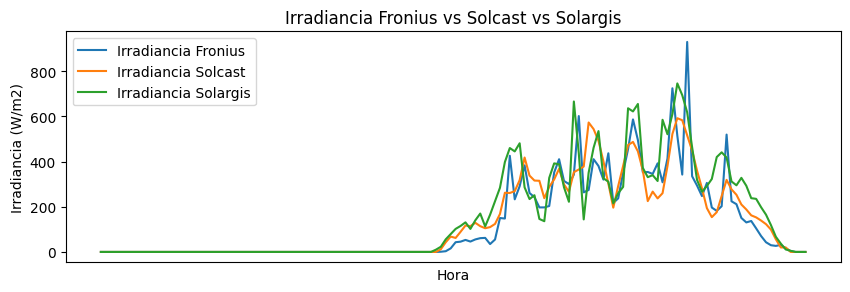

Área bajo la curva Fronius: 18570.33260632642 W/m2
Área bajo la curva Solacast: 19069.333333333332 W/m2
Área bajo la curva Solargis: 22586.0 W/m2


In [43]:
# graficar  Irr en new_df
plt.figure(figsize=(10,3))
plt.plot(new_df_SVF['Hora'], new_df_SVF['Irr'], label='Irradiancia Fronius')
# agregar grafica de  GHI de df_solcast
plt.plot(new_df_solcast['Time'], new_df_solcast['GHI'], label='Irradiancia Solcast')
# agregar grafica de  GHI de df_solcast
plt.plot(df_solargis['Time'], df_solargis['GHI'], label='Irradiancia Solargis')

plt.xlabel('Hora')
plt.ylabel('Irradiancia (W/m2)')
plt.title('Irradiancia Fronius vs Solcast vs Solargis')
plt.xticks([])
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Calcular el área bajo la curva mediante integración numérica
area = simps(new_df_SVF['Irr'], dx=1)
print('Área bajo la curva Fronius:', area, 'W/m2')

# Calcular el área bajo la curva mediante integración numérica
area = simps(new_df_solcast['GHI'], dx=1)
print('Área bajo la curva Solacast:', area, 'W/m2')

# Calcular el área bajo la curva mediante integración numérica
area = simps(df_solargis['GHI'], dx=1)
print('Área bajo la curva Solargis:', area, 'W/m2')

## Potencia Generada por un sistema fotovoltaico
Potencia (W)=Radiación Solar (W/m 2 )×Eficiencia del Panel Solar× Area del Panel Solar (m 2 )

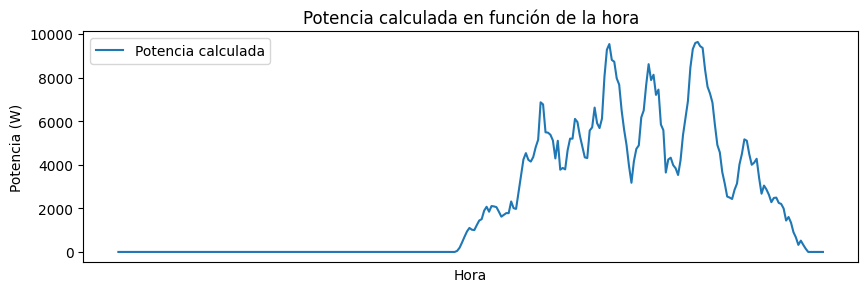

Área bajo la curva: 618896.2650766559 Wh


In [49]:
eficiencia = 0.2094
catidad_pv= 30
area =2.274*1.134

# imprimir df_solcast['GHI']
# print(df_solcast['GHI'], df_solcast['Time'])

# crear una nueva columna en df_solcast que se llame 'Potencia calculada' 
df_solcast['Potencia calculada'] = df_solcast['GHI'] * eficiencia * area * catidad_pv
# print(df_solcast.head())

# graficar la potencia calculada en función del tiempo
plt.figure(figsize=(10,3))
plt.plot(df_solcast['Time'], df_solcast['Potencia calculada'], label='Potencia calculada')
plt.xlabel('Hora')
plt.ylabel('Potencia (W)')
plt.title('Potencia calculada en función de la hora')
plt.xticks([])
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Calcular el área bajo la curva mediante integración numérica
area = simps(df_solcast['Potencia calculada'], dx=1)
print('Área bajo la curva:', area, 'Wh')
